In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Vehicle.csv")
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [ ]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df_cleaned = df.drop(columns=['name'])

In [ ]:
print("Null values in each column:\n", df_cleaned.isnull().sum())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
print("\nStandardized Data (first 5 rows):\n", df_scaled[:5])

Null values in each column:
 year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

Standardized Data (first 5 rows):
 [[-1.44507431  0.08113906  1.01499338  0.44819164  0.33927557 -0.66507931
  -0.76774602]
 [-1.44507431 -0.3476891   1.01499338  0.44819164  0.33927557 -0.66507931
  -0.63809636]
 [-0.2587948   0.7243813  -0.97405145  0.44819164  0.33927557 -0.66507931
   0.16573147]
 [ 0.92748471 -0.43345473  1.01499338  0.44819164  0.33927557 -0.66507931
  -0.43930023]
 [ 0.215717    1.60347903 -0.97405145  0.44819164  0.33927557  0.95651856
  -0.09356783]]


In [ ]:
cov_matrix = np.cov(df_scaled.T)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00023047 -0.41978487 -0.12002956 -0.09837418 -0.14383357 -0.41480074
   0.41401708]
 [-0.41978487  1.00023047 -0.28616084  0.11371562  0.12025394  0.29718352
  -0.19233295]
 [-0.12002956 -0.28616084  1.00023047  0.03880568  0.03925776 -0.01091286
  -0.26971558]
 [-0.09837418  0.11371562  0.03880568  1.00023047  0.17496526  0.1657189
  -0.15158916]
 [-0.14383357  0.12025394  0.03925776  0.17496526  1.00023047  0.0789108
  -0.53032733]
 [-0.41480074  0.29718352 -0.01091286  0.1657189   0.0789108   1.00023047
  -0.20788824]
 [ 0.41401708 -0.19233295 -0.26971558 -0.15158916 -0.53032733 -0.20788824
   1.00023047]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors (each column is an eigenvector):\n", eigenvectors)


Eigenvalues:
 [2.23989055 1.38975869 0.36018669 0.4188761  0.63722134 1.02540894
 0.93027096]

Eigenvectors (each column is an eigenvector):
 [[-0.49785205  0.12840645 -0.30267315  0.62539663  0.2914474   0.39602156
   0.10558636]
 [ 0.37946909 -0.51725096  0.05918136  0.60258682 -0.43242052  0.09884562
  -0.15837735]
 [ 0.08479062  0.6372356   0.25166485  0.44888714 -0.19911472 -0.50985152
   0.14936945]
 [ 0.24305191  0.05175383 -0.03332789 -0.09528094 -0.22510383  0.34751122
   0.8698404 ]
 [ 0.3698389   0.32112846  0.53501534  0.03480625  0.28549771  0.57204137
  -0.25278952]
 [ 0.39635618 -0.26807937 -0.03514907  0.1811832   0.74473679 -0.34350413
   0.25366206]
 [-0.49799983 -0.36362827  0.7436153   0.03392987  0.04013316 -0.08635642
   0.23788147]]


In [ ]:
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_idx]
eigenvectors_sorted = eigenvectors[:, sorted_idx]
print("\nSorted Eigenvalues:\n", eigenvalues_sorted)


Sorted Eigenvalues:
 [2.23989055 1.38975869 1.02540894 0.93027096 0.63722134 0.4188761
 0.36018669]


In [ ]:
k = 3
top_k_eigenvectors = eigenvectors_sorted[:, :k]
print(f"\nTop {k} Eigenvectors:\n", top_k_eigenvectors)


Top 3 Eigenvectors:
 [[-0.49785205  0.12840645  0.39602156]
 [ 0.37946909 -0.51725096  0.09884562]
 [ 0.08479062  0.6372356  -0.50985152]
 [ 0.24305191  0.05175383  0.34751122]
 [ 0.3698389   0.32112846  0.57204137]
 [ 0.39635618 -0.26807937 -0.34350413]
 [-0.49799983 -0.36362827 -0.08635642]]


In [ ]:
pca_transformed = df_scaled.dot(top_k_eigenvectors)
print(f"\nPCA Transformed Data (first 5 rows using top {k} PCs):\n", pca_transformed[:5])


PCA Transformed Data (first 5 rows using top 3 PCs):
 [[ 1.18942512  1.00887868 -0.43716769]
 [ 0.96213259  1.18354618 -0.49075155]
 [ 0.20940001 -0.77844203  1.029712  ]
 [-0.35059663  1.46027251  0.42318809]
 [ 1.07861509 -1.51265419  0.76989046]]


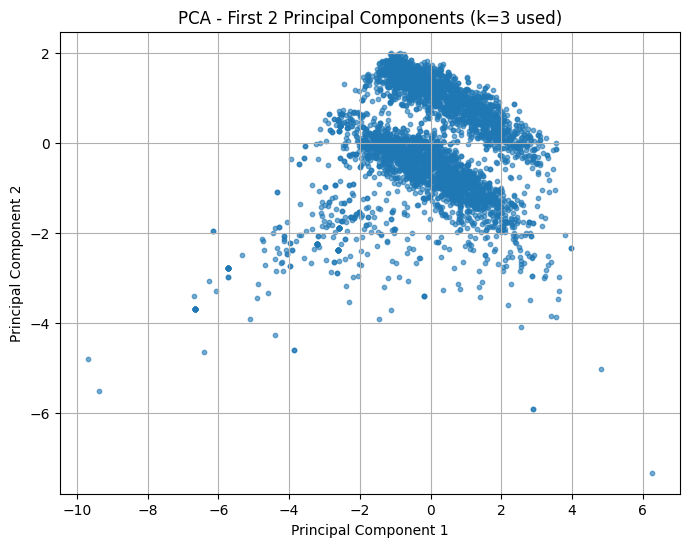

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.6, s=10)
plt.title("PCA - First 2 Principal Components (k=3 used)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
explained_variance_ratio = eigenvalues_sorted / eigenvalues_sorted.sum()
print(f"\nExplained Variance Ratio (First {k} PCs): {explained_variance_ratio[:k]}")
print(f"Total Variance Explained by First {k} PCs: {explained_variance_ratio[:k].sum():.4f}")



Explained Variance Ratio (First 3 PCs): [0.31991064 0.19849121 0.14645324]
Total Variance Explained by First 3 PCs: 0.6649


## **LDA**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Vehicle.csv")

In [ ]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

class_label = 'fuel'
y = df[class_label]
X = df.drop(columns=['name', class_label])

In [ ]:
print("Null values:\n", df.isnull().sum())

Null values:
 name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64


In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
class_labels = np.unique(y)
n_features = X.shape[1]
mean_overall = np.mean(X_std, axis=0)


In [ ]:
S_W = np.zeros((n_features, n_features))
S_B = np.zeros((n_features, n_features))

for c in class_labels:
    X_c = X_std[y == c]
    mean_c = np.mean(X_c, axis=0)
    S_W += np.dot((X_c - mean_c).T, (X_c - mean_c))
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
    S_B += n_c * mean_diff.dot(mean_diff.T)


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [ ]:
sorted_indices = np.argsort(np.abs(eig_vals))[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [ ]:
W = eig_vecs[:, :2]
X_lda = X_std.dot(W)

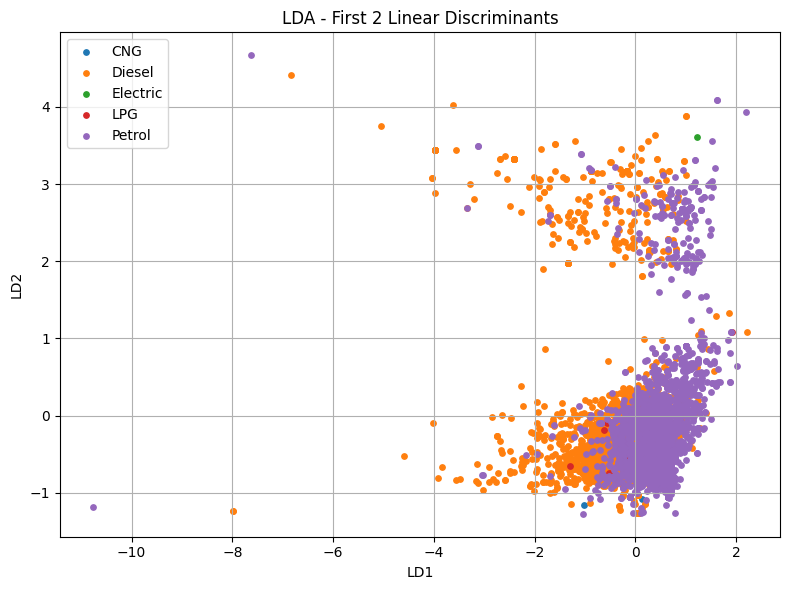

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f"{label_encoders[class_label].inverse_transform([label])[0]}", s=15)
plt.title("LDA - First 2 Linear Discriminants")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

print("\nTop 5 Eigenvalues:", eig_vals[:5])
print("Total Variance Explained by First 2 LDA Components:", np.real(eig_vals[:2].sum()))



Top 5 Eigenvalues: [ 3.06722754e-01  4.45593414e-03  3.63958290e-03  1.77346339e-03
 -1.76513192e-17]
Total Variance Explained by First 2 LDA Components: 0.3111786882676555
